# 📊 Zomato Bangalore Restaurant Trends

## 🎯 Objective

The aim of this hackathon is to perform data-driven analysis of restaurant trends in Bangalore using Zomato’s real-world dataset. Participants are expected to:
Clean and preprocess the data
+ Perform exploratory data analysis (EDA)
+ Merge location data for mapping
+ Extract actionable insights
+ Answer MCQ-style reasoning questions based on analysis


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from IPython.core.display import display,HTML
import folium
import plotly
import geopandas as gpd
from folium.plugins import HeatMap

C:\Users\saram\AppData\Local\Temp\ipykernel_8588\1035116775.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display,HTML


In [37]:
zomato=pd.read_csv(r"C:\Users\saram\Downloads\zomato_data.csv")
geo=pd.read_csv(r"C:\Users\saram\Downloads\Geographical_Coordinates.csv")

In [39]:
zomato.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'dish_liked', 'cuisines', 'approx_costfor_two_people', 'listed_intype',
       'listed_incity'],
      dtype='object')

In [41]:
geo.columns

Index(['listed_incity', 'Latitude', 'Longitude'], dtype='object')

## DATA CLEANING & PREPROCESSING

### Rating Column

In [46]:
# Step 1: Replace '-' with NaN
zomato['rate'] = zomato['rate'].replace('-', np.nan)

# Step 2: Remove '/5' and retain only the numeric value
zomato['rate'] = zomato['rate'].str.replace('/5', '', regex=False)

# Step 3: Convert to float using pd.to_numeric
zomato['rate'] = pd.to_numeric(zomato['rate'], errors='coerce')

# Step 4: Fill missing values with the median rating
median_rating = zomato['rate'].median()
zomato['rate'] = zomato['rate'].fillna(median_rating)

# Display the first few rows to verify the changes
print(zomato[['rate']].head())


   rate
0   4.1
1   4.1
2   3.8
3   3.7
4   3.8


In [48]:
print("After processing 'rate' column:")
print(zomato['rate'].describe())


After processing 'rate' column:
count    51717.000000
mean         3.700362
std          0.395391
min          1.800000
25%          3.500000
50%          3.700000
75%          3.900000
max          4.900000
Name: rate, dtype: float64


In [50]:
print("\nMissing values in 'rate':",zomato['rate'].isnull().sum())
print("\n")


Missing values in 'rate': 0




### Cost Column

In [53]:
# Remove commas from numeric strings
zomato['approx_costfor_two_people'] = zomato['approx_costfor_two_people'].str.replace(',', '', regex=False)

# Convert to numeric using pd.to_numeric
zomato['approx_costfor_two_people'] = pd.to_numeric(zomato['approx_costfor_two_people'], errors='coerce')

# Fill missing values with the median cost
median_cost = zomato['approx_costfor_two_people'].median()
zomato['approx_costfor_two_people'] = zomato['approx_costfor_two_people'].fillna(median_cost)

print(zomato[['rate', 'approx_costfor_two_people']].head())


   rate  approx_costfor_two_people
0   4.1                      800.0
1   4.1                      800.0
2   3.8                      800.0
3   3.7                      300.0
4   3.8                      600.0


In [55]:
print("After processing 'approx_costfor_two_people' column:")
print(zomato['approx_costfor_two_people'].describe())

After processing 'approx_costfor_two_people' column:
count    51717.000000
mean       554.391689
std        437.563723
min         40.000000
25%        300.000000
50%        400.000000
75%        650.000000
max       6000.000000
Name: approx_costfor_two_people, dtype: float64


In [57]:
print("\nMissing values in 'approx_costfor_two_people':", zomato['approx_costfor_two_people'].isnull().sum())
print("\n")


Missing values in 'approx_costfor_two_people': 0




### Categorical Columns

In [61]:
# Replace NaN in 'dish_liked' with "Not Available"
zomato['dish_liked'] = zomato['dish_liked'].fillna("Not Available")

# Replace NaN in 'cuisines' with "Other"
zomato['cuisines'] = zomato['cuisines'].fillna("Other")

# Replace NaN in 'rest_type' with "Unknown"
zomato['rest_type'] = zomato['rest_type'].fillna("Unknown")

# Display the first few rows to verify the changes
print(zomato[['rate', 'approx_costfor_two_people', 'dish_liked', 'cuisines', 'rest_type']].head())


   rate  approx_costfor_two_people  \
0   4.1                      800.0   
1   4.1                      800.0   
2   3.8                      800.0   
3   3.7                      300.0   
4   3.8                      600.0   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines            rest_type  
0  North Indian, Mughlai, Chinese        Casual Dining  
1     Chinese, North Indian, Thai        Casual Dining  
2          Cafe, Mexican, Italian  Cafe, Casual Dining  
3      South Indian, North Indian          Quick Bites  
4        North Indian, Rajasthani        Casual Dining  


In [63]:
print("After processing categorical columns:")
print(zomato[['dish_liked', 'cuisines', 'rest_type']].isnull().sum())

After processing categorical columns:
dish_liked    0
cuisines      0
rest_type     0
dtype: int64


### Votes Column


In [67]:
# Fill missing values with the median votes
median_votes = zomato['votes'].median()
zomato['votes'] = zomato['votes'].fillna(median_votes)


In [69]:
print("After processing 'votes' column:")
print(zomato['votes'].describe())
print("\nMissing values in 'votes':",zomato['votes'].isnull().sum())

After processing 'votes' column:
count    51717.000000
mean       283.697527
std        803.838853
min          0.000000
25%          7.000000
50%         41.000000
75%        198.000000
max      16832.000000
Name: votes, dtype: float64

Missing values in 'votes': 0


### Binary Encoding

In [72]:
# Convert 'online_order','book_table' to binary (Yes → 1, No → 0)
zomato['online_order'] = zomato['online_order'].map({'Yes': 1, 'No': 0})
zomato['book_table'] = zomato['book_table'].map({'Yes': 1, 'No': 0})


In [74]:
print("After binary encoding 'online_order' and 'book_table':")
print(zomato[['online_order', 'book_table']].head())

After binary encoding 'online_order' and 'book_table':
   online_order  book_table
0             1           1
1             1           0
2             1           0
3             0           0
4             0           0


In [76]:
print(zomato[['online_order', 'book_table']].dtypes)

online_order    int64
book_table      int64
dtype: object


In [78]:
print(zomato[['online_order', 'book_table']].isnull().sum())

online_order    0
book_table      0
dtype: int64


### Data Type Conversion

In [82]:
# Ensure 'rate' is float
zomato['rate'] = zomato['rate'].astype(float)

# Convert 'votes' to integer
zomato['votes'] = zomato['votes'].astype(int)

# Convert 'approx_costfor_two_people' to integer
zomato['approx_costfor_two_people'] = zomato['approx_costfor_two_people'].astype(int)

In [84]:
print(zomato[['rate', 'votes', 'approx_costfor_two_people']].dtypes)

rate                         float64
votes                          int32
approx_costfor_two_people      int32
dtype: object


In [86]:
print(zomato[['rate', 'votes', 'approx_costfor_two_people']].describe())

               rate         votes  approx_costfor_two_people
count  51717.000000  51717.000000               51717.000000
mean       3.700362    283.697527                 554.391689
std        0.395391    803.838853                 437.563723
min        1.800000      0.000000                  40.000000
25%        3.500000      7.000000                 300.000000
50%        3.700000     41.000000                 400.000000
75%        3.900000    198.000000                 650.000000
max        4.900000  16832.000000                6000.000000


In [88]:
print(zomato[['rate', 'votes', 'approx_costfor_two_people']].isnull().sum())

rate                         0
votes                        0
approx_costfor_two_people    0
dtype: int64


In [90]:
# Final verification of the entire dataset
print(zomato.info())
print(zomato.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int64  
 1   book_table                 51717 non-null  int64  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int32  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  int32  
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(1), int32(2), int64(2), object(5)
memory usage: 3.6+ MB
None
online_order                 0
book_table                   0
rate                         0
votes                        0
rest_type         

In [92]:
zomato.to_csv("cleaned_zomato_data.csv", index=False)

In [99]:
df= pd.read_csv(
    r"C:\Users\saram\cleaned_zomato_data.csv",
    quotechar='"',
    escapechar='\\',
    encoding='utf-8',
    engine='python',       # switch to more flexible parser
    on_bad_lines='skip'    # skip bad lines
)


## Dataset Merging for Mapping

In [101]:
merged_df = pd.merge(df,geo, on='listed_incity', how='left')

# 🗺️ Geospatial Visualization Task.


## 🎯Objective

The Geospatial Visualization Task aims to help participants perform location-based analysis using a restaurant dataset. This task focuses on visualizing restaurant density and creating cuisine-specific maps using Folium—a Python library for generating interactive maps. The goal is to provide insights into the spatial distribution of restaurants across Bangalore and identify patterns based on restaurant type, ratings, and location.


# 1. Restaurant Density Map

In [108]:

density_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)
heat_data = [[row['Latitude'], row['Longitude']] for index, row in merged_df.iterrows()
             if not pd.isnull(row['Latitude']) and not pd.isnull(row['Longitude'])]

HeatMap(heat_data).add_to(density_map)

display(density_map)


#  2. Italian Restaurant Location Map

In [139]:
italian_map = folium.Map(location=[geo['Latitude'].mean(), geo['Longitude'].mean()],zoom_start=12)
for idx, row in geo.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            icon=folium.Icon(color='green', icon='cutlery', prefix='fa')
        ).add_to(italian_map)

italian_map


## DATA VISUALIZATION

In [175]:
# Statistical Summary
print("Numerical Summary:")
print(df[['rate', 'votes', 'approx_costfor_two_people']].describe())
print("\nCategorical Summary:")
print(df['rest_type'].value_counts().head(10))
print(df['listed_intype'].value_counts().head(10))
plt.figure(figsize=(15, 10))



Numerical Summary:
               rate         votes  approx_costfor_two_people
count  51717.000000  51717.000000               51717.000000
mean       3.700362    283.697527                 554.391689
std        0.395391    803.838853                 437.563723
min        1.800000      0.000000                  40.000000
25%        3.500000      7.000000                 300.000000
50%        3.700000     41.000000                 400.000000
75%        3.900000    198.000000                 650.000000
max        4.900000  16832.000000                6000.000000

Categorical Summary:
rest_type
Quick Bites           19132
Casual Dining         10330
Cafe                   3732
Delivery               2604
Dessert Parlor         2263
Takeaway, Delivery     2037
Casual Dining, Bar     1154
Bakery                 1141
Beverage Shop           867
Bar                     697
Name: count, dtype: int64
listed_intype
Delivery              25942
Dine-out              17779
Desserts               3

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'Frequency')

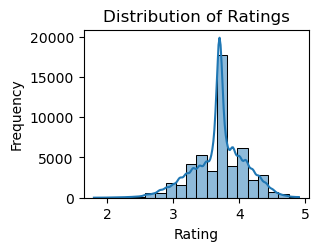

In [177]:

# Histogram of Ratings
plt.subplot(2, 2, 1)
sns.histplot(df['rate'].dropna(), bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")

Text(0, 0.5, 'Rating')

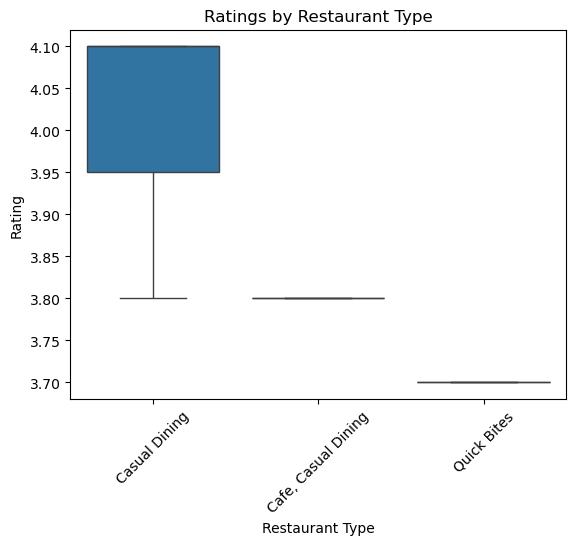

In [178]:
# Box Plot of Ratings by Restaurant Type
plt.subplot(1, 1, 1)
sns.boxplot(x='rest_type', y='rate', data=df.head())
plt.title("Ratings by Restaurant Type")
plt.xticks(rotation=45)
plt.xlabel("Restaurant Type")
plt.ylabel("Rating")


Text(0, 0.5, 'Rating')

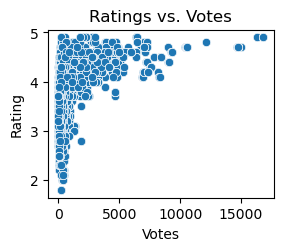

In [180]:
# Scatter Plot of Ratings vs. Votes
plt.subplot(2, 2, 3)
sns.scatterplot(x='votes', y='rate', data=df)
plt.title("Ratings vs. Votes")
plt.xlabel("Votes")
plt.ylabel("Rating")


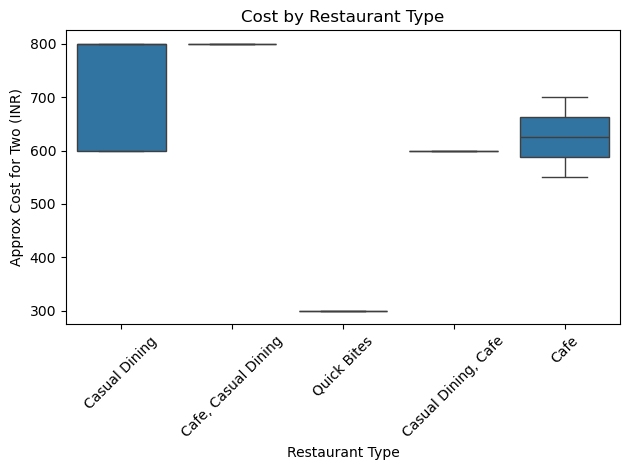

In [182]:
# Box Plot of Cost by Restaurant Type
plt.subplot(1, 1, 1)
sns.boxplot(x='rest_type', y='approx_costfor_two_people', data=df.head(10))
plt.title("Cost by Restaurant Type")
plt.xticks(rotation=45)
plt.xlabel("Restaurant Type")
plt.ylabel("Approx Cost for Two (INR)")
plt.tight_layout()
plt.show()



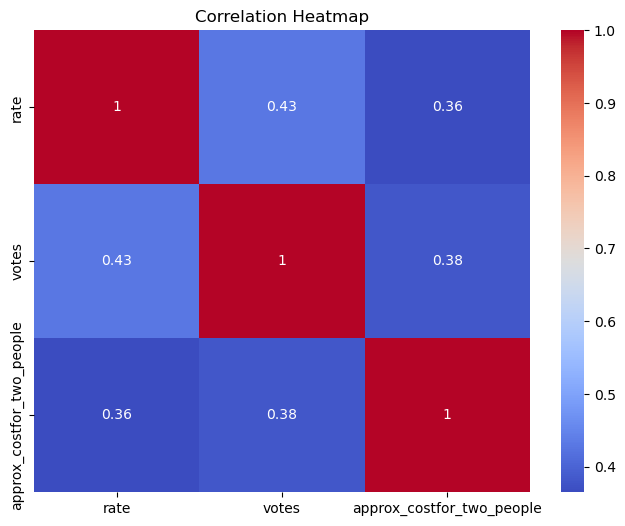

In [185]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['rate', 'votes', 'approx_costfor_two_people']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()